In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import load_model
from threedigitmnist import NumbersVocabulary

Using TensorFlow backend.


In [2]:
nv = NumbersVocabulary(3, '<beg>', '<end>', '<unk>', '<abs>')
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
m = load_model('3dm.pkl')
m.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_input (InputLayer)        (None, 28, 84, 1)    0                                            
__________________________________________________________________________________________________
image_encoder (Model)           (None, 100)          511520      image_input[0][0]                
__________________________________________________________________________________________________
caption_input (InputLayer)      (None, None)         0                                            
__________________________________________________________________________________________________
repeat_vector_1 (RepeatVector)  (None, 1, 100)       0           image_encoder[1][0]              
__________________________________________________________________________________________________
caption_en

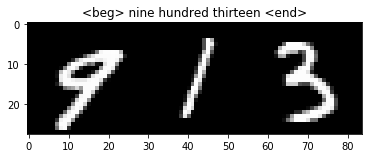

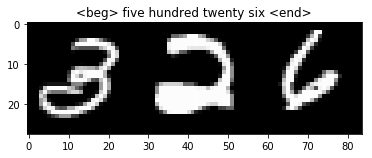

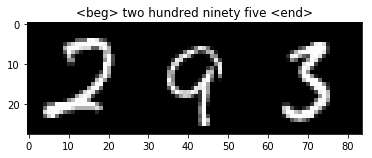

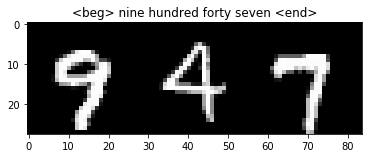

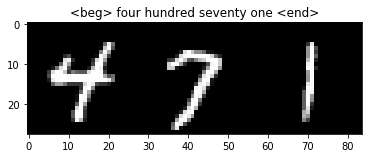

In [4]:
def show_decoded_example():
    x, y = nv.batch(x_test, y_test, 1)

    img = x[0]
    cap = [[nv.v[nv.start]]]

    for i in range(6):
        hc = m.predict([img, np.array(cap)])
        hc_s = np.argmax(hc, axis=2)
        cap[0].append(hc_s[0, -1])
        if hc_s[0, -1] == nv.v[nv.end]:
            break

    plt.imshow(img.reshape([28, 28*3]), cmap='gray')
    plt.title(' '.join([nv.iv[t] for t in cap[0]]))
    plt.show()

for i in range(5):
    show_decoded_example()